In [461]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


In [462]:
# def imshow(path):
#     # image = cv2.imread(path)
#     modified = cv2.cvtColor(path,cv2.COLOR_BGR2RGB)
#     # gray_image = cv2.cvtColor(modified,cv2.COLOR_RGB2GRAY)
#     return plt.imshow(modified)

def imshow(raw_pic):
    modified = cv2.cvtColor(raw_pic,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,14))
    return plt.imshow(modified)

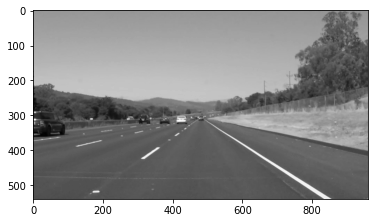

In [463]:
image = cv2.imread('./Images/solidWhiteRight.jpg')
gray_image = cv2.imread('./Images/solidWhiteRight.jpg',cv2.IMREAD_GRAYSCALE)
gray_image
plt.imshow(gray_image, cmap='gray')

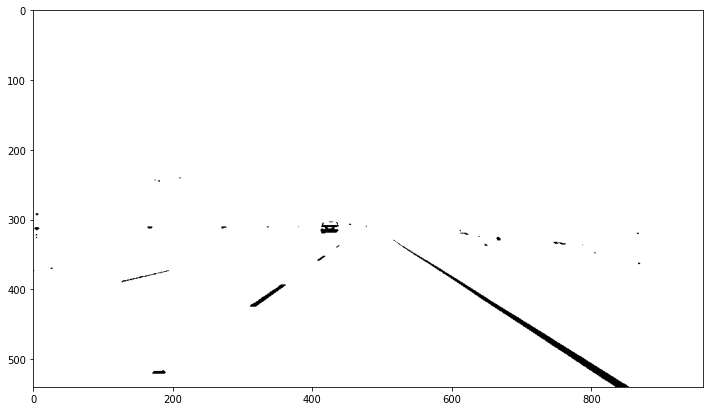

In [464]:
retval, dst = cv2.threshold(gray_image,201,255,cv2.THRESH_BINARY_INV)

imshow(dst)

In [465]:
# cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
# ret, threshold = cv2.threshold(gray_image,200,255,cv2.THRESH_BINARY_INV)
# imshow(threshold)

# dilation = cv2.dilate(threshold,cross,iterations=1)
# imshow(dilation)

In [466]:
# ret, otsu = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# plt.imshow(otsu,cmap='gray')

In [467]:
contours, hierarchy = cv2.findContours(dst,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_NONE)

In [468]:
len(contours)

44

In [469]:
contours

(array([[[422, 311]],
 
        [[423, 312]],
 
        [[424, 312]],
 
        [[425, 312]],
 
        [[426, 312]],
 
        [[427, 311]],
 
        [[428, 311]],
 
        [[427, 311]],
 
        [[426, 311]],
 
        [[425, 311]],
 
        [[424, 311]],
 
        [[423, 311]]], dtype=int32),
 array([[[0, 0]],
 
        [[0, 1]],
 
        [[0, 2]],
 
        ...,
 
        [[3, 0]],
 
        [[2, 0]],
 
        [[1, 0]]], dtype=int32),
 array([[[184, 516]],
 
        [[185, 515]],
 
        [[186, 515]],
 
        [[187, 515]],
 
        [[188, 516]],
 
        [[189, 517]],
 
        [[190, 518]],
 
        [[190, 519]],
 
        [[189, 520]],
 
        [[188, 521]],
 
        [[187, 521]],
 
        [[186, 521]],
 
        [[185, 521]],
 
        [[184, 521]],
 
        [[183, 521]],
 
        [[182, 521]],
 
        [[181, 521]],
 
        [[180, 521]],
 
        [[179, 521]],
 
        [[178, 521]],
 
        [[177, 521]],
 
        [[176, 521]],
 
        [[175, 521]],
 

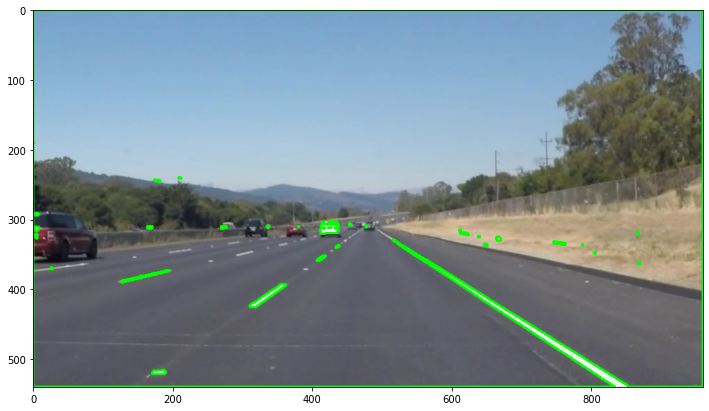

In [470]:
copy = image.copy()
cv2.drawContours(copy,contours,-1,(0,255,0),2)
imshow(copy)

In [471]:
sorted_contours = sorted(contours,key=cv2.contourArea, reverse=True)

In [472]:
sorted_contours

[array([[[0, 0]],
 
        [[0, 1]],
 
        [[0, 2]],
 
        ...,
 
        [[3, 0]],
 
        [[2, 0]],
 
        [[1, 0]]], dtype=int32),
 array([[[354, 393]],
 
        [[355, 392]],
 
        [[356, 392]],
 
        [[357, 392]],
 
        [[358, 392]],
 
        [[359, 392]],
 
        [[360, 392]],
 
        [[361, 392]],
 
        [[362, 393]],
 
        [[362, 394]],
 
        [[361, 395]],
 
        [[360, 395]],
 
        [[359, 396]],
 
        [[358, 397]],
 
        [[357, 398]],
 
        [[356, 398]],
 
        [[355, 399]],
 
        [[354, 400]],
 
        [[353, 400]],
 
        [[352, 401]],
 
        [[351, 402]],
 
        [[350, 403]],
 
        [[349, 403]],
 
        [[348, 404]],
 
        [[347, 405]],
 
        [[346, 405]],
 
        [[345, 406]],
 
        [[344, 407]],
 
        [[343, 408]],
 
        [[342, 408]],
 
        [[341, 409]],
 
        [[340, 410]],
 
        [[339, 410]],
 
        [[338, 411]],
 
        [[337, 412]],
 
        [[33

In [473]:
len(sorted_contours)

44

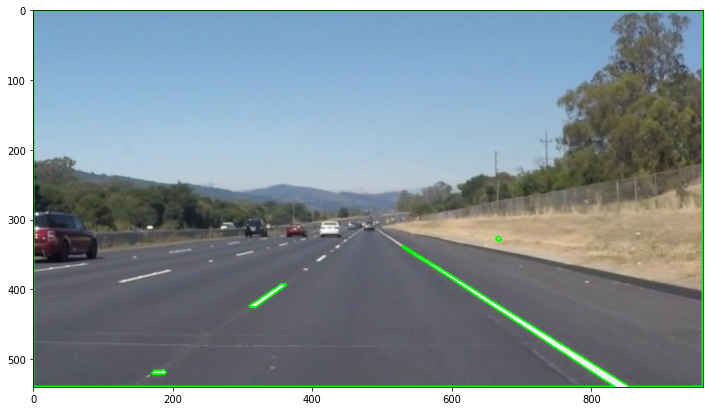

In [474]:
copy1 = image.copy() # 0:3, 5, 7
list = [0,1,4,7]
for i in list:
    cv2.drawContours(copy1,sorted_contours[i],-1,(0,255,0),2)
imshow(copy1)

In [475]:
# # Lines
# copy1 = image.copy()
# first_point = (180,520)

# second_point = (410,360)

# color = (255,255,0)

# thickness = 2
# cv2.line(copy1,first_point,second_point,color,thickness)
# imshow(copy1)

In [476]:
copy1 = image.copy()
edges = cv2.Canny(copy1,50,150,apertureSize = 3)

In [477]:
lines = cv2.HoughLines(edges,1,np.pi/180,200)

In [478]:
print(lines)

[[[  5.          2.1293018]]

 [[210.          1.7627826]]

 [[ -3.          2.146755 ]]

 [[347.          1.4835298]]

 [[190.          1.7976891]]

 [[384.          1.3962634]]

 [[317.          1.553343 ]]

 [[320.          1.5358897]]

 [[329.          1.5184364]]]


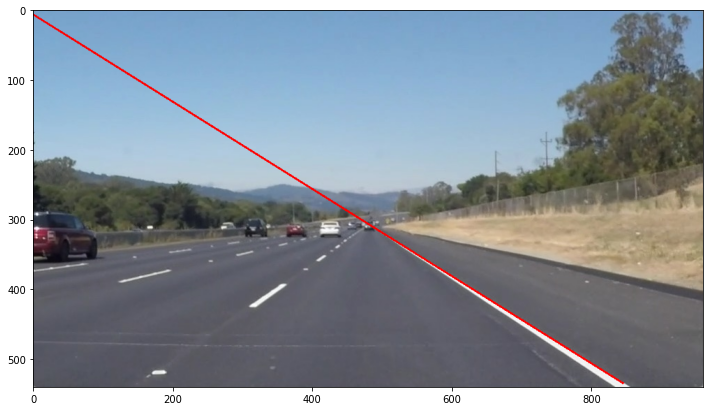

In [479]:
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(copy1,(x1,y1),(x2,y2),(0,0,255),2)
imshow(copy1)
#cv2.imwrite('new.jpg',copy1) 